In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Ploting Data

In [118]:
data = pd.read_csv('Data/ex1data1.txt', names={'X':0, 'y' :1})

In [119]:
data.head()

,X,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [120]:
X = data['X']
y = data['y']
m = len(X)

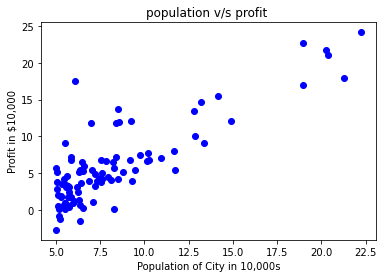

In [121]:
def plotData(x_axis,y_axis):
    plt.plot(X ,y, 'bo')
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000')
    plt.title('population v/s profit ')
    
plotData(X,y)

# Gradient Descent

In [122]:
X = np.stack([np.ones(m), X],axis=1); X[:5]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598]])

### Cost function

In [150]:
def cost(X, y,theta):
    m=len(y)
    inner = np.power(np.dot(X, theta) - y ,2)
    return np.sum(inner/(2*m))
J = cost(X, y, theta=np.array([-1, 2]))
print(J)

54.24245508201237


In [165]:
def Grad_decent(X, y, theta, alpha, num_iter):
    J_hist=[]
    m=len(y)
    for i in range(num_iter):
        hypothesis = np.dot(X, np.transpose(theta))-y
        inner = (1/m)*np.dot(hypothesis,X)
        theta = theta - alpha*(inner)
        J_hist.append(cost(X, y,theta))
    return theta,J_hist


In [172]:
theta = np.zeros(2)

# some gradient descent settings
iterations = 1500
alpha = 0.01

theta, J_history = Grad_decent(X ,y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
print('Expected theta values (approximately): [-3.6303, 1.1664]')


Theta found by gradient descent: -3.6303, 1.1664
Expected theta values (approximately): [-3.6303, 1.1664]


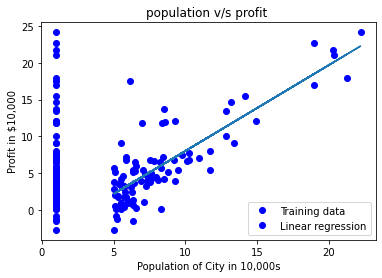

In [170]:
# plot the linear fit
plotData(X[:, 1], y)
plt.plot(X[:, 1], np.dot(X, theta), '-')
plt.legend(['Training data', 'Linear regression']);

In [173]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1, 3.5], theta)
print('For population = 35,000, we predict a profit of {:.2f}\n'.format(predict1*10000))

predict2 = np.dot([1, 7], theta)
print('For population = 70,000, we predict a profit of {:.2f}\n'.format(predict2*10000))

For population = 35,000, we predict a profit of 4519.77

For population = 70,000, we predict a profit of 45342.45

